In [134]:
import tensorflow as tf

# Importing matplotlib to plot images.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
# Importing SK-learn to calculate precision and recall
import sklearn
import sklearn.metrics

# Used for graph export
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K

tf.__version__

'1.5.0'

In [135]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(np.shape(x_train))

(60000, 28, 28)


In [136]:

df1 = pd.read_pickle("processed_ash_pck.pkl")
df2 = pd.read_pickle("P1_pck.pkl")
temp = [df1,df2]
df = pd.concat(temp)
x_train = []
y1_train = df.x_curr
y2_train = df.y_curr
y1_train = (np.reshape(y1_train,(-1,1)))
y2_train = np.reshape(y2_train,(-1,1))
y = np.append(y1_train,y2_train,axis = 1)
print(df.x_actual[0])
print(df.y_actual[0])
[x_train.append(np.reshape(a,(27,15))) for a in df.aray2]
#[y1_train.append(a) for a,b in df.x_actual,df.y_actual]
#[y2_train.append(a) for a in df.y_actual]
#y1_train = np.reshape(y1_train,(-1,len(y1_train)))
#y2_train = np.reshape(y2_train,(-1,len(y2_train)))
#print(np.hstack(y1_train,y2_train))
x_train = np.asarray(x_train)
x_train = x_train.astype(np.float32)
x_train /= 255
print(np.shape(x_train))





df6 = pd.read_pickle("P3_pck.pkl")
x_test = []
y1_test = df6.x_curr
y2_test = df6.y_curr
y1_test = (np.reshape(y1_test,(-1,1)))
y2_test = np.reshape(y2_test,(-1,1))
y_test = np.append(y1_test,y2_test,axis = 1)
mobx_test = df6.x_actual
moby_test = df6.y_actual
mobx_test = (np.reshape(mobx_test,(-1,1)))
moby_test = np.reshape(moby_test,(-1,1))
mob_test = np.append(mobx_test,moby_test,axis = 1)
[x_test.append(np.reshape(a,(27,15))) for a in df6.aray2]
#[y1_train.append(a) for a,b in df.x_actual,df.y_actual]
#[y2_train.append(a) for a in df.y_actual]
#y1_train = np.reshape(y1_train,(-1,len(y1_train)))
#y2_train = np.reshape(y2_train,(-1,len(y2_train)))
#print(np.hstack(y1_train,y2_train))
x_test = np.asarray(x_test)
x_test = x_test.astype(np.float32)
x_test /= 255

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


0    306.0
0    327.0
Name: x_actual, dtype: float64
0     518.0
0    1688.0
Name: y_actual, dtype: float64
(61035, 27, 15)


In [137]:
# flatten image data <- NOT FOR CNN
#x_train = x_train.reshape(-1, 784)
#x_test = x_test.reshape(-1, 784)

# For CNNs  ->
###   DIFFERENT RESHAPE  ### 
### We here need the dimensions of the image plus a channel, e.g. for RGB images one have 3 channels ###
x_train = x_train.reshape(-1, 27, 15, 1)
#x_test = x_test.reshape(-1, 28, 28, 1)

# convert to float
x_train = x_train.astype(np.float32)
#x_test = x_test.astype(np.float32)

# normalize to a scale between 0 and 1
#x_train /= 255

print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (one-hot notation)
#num_classes = 10
#y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
#y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)
print(np.shape(x_train))
shuffle = np.arange(0,len(x_train))
np.random.shuffle(shuffle)
x_train = x_train[shuffle]
y = y[shuffle]

61035 train samples
(61035, 27, 15, 1)


In [138]:
print(y_test[0])

[508. 617.]


[558. 659.]


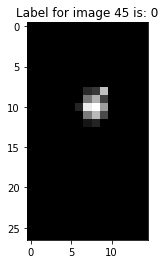

In [139]:
i = 45
plt.imshow(x_train[i].reshape(27, 15),cmap='gray') #np.sqrt(784) = 28
plt.title("Label for image %i is: %s" % (i, np.argmax(y_train[i])))
print(y[i])

In [140]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [149]:
########## HYPER PARAMETERS
batch_size = 128
epochs = 20
optimizer = tf.keras.optimizers.Adam(decay=0.001)
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()

### OLD ARCHITECTURE START
#model.add(tf.keras.layers.Dense(5, activation='relu', input_shape=(784,)))
### OLD ARCHITECTURE END

### NEW CNN ARCHITECTURE
model.add(tf.keras.layers.Conv2D(5, kernel_size=(7, 7), activation='relu', padding='same',input_shape=(27,15,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same', data_format=None))
model.add(tf.keras.layers.Conv2D(5, kernel_size=(5, 5), activation='relu', padding='same',input_shape=(27,15,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same', data_format=None))
model.add(tf.keras.layers.Conv2D(5, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(27,15,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same', data_format=None))
model.add(tf.keras.layers.Flatten())
### NEW CNN ARCHITECTURE
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25, noise_shape=None, seed=None))

model.add(tf.keras.layers.Dense(2, activation=None))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mae','acc'])

history = model.fit(x_train, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 27, 15, 5)         250       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 27, 15, 5)         0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 27, 15, 5)         630       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 27, 15, 5)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 27, 15, 5)         230       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 27, 15, 5)         0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 2025)              0         
__________

In [151]:
# use model for inference to get test accuracy
val = (x_test[600]).reshape(-1, 27, 15, 1)
y_test_pred = model.predict(val)
#y_test_pred = np.argmax(y_test_pred, axis=1)

print(y_test_pred)

#print ('\n Summary of the precision, recall, F1 score for each class:')
#print (sklearn.metrics.classification_report(y_test, y_test_pred))

#print ('\n Confusion matrix: ')
#print (sklearn.metrics.confusion_matrix(y_test, y_test_pred))

[[797.35443 491.11905]]


In [152]:
print(y_test[600])
print(mob_test[600])

[830. 512.]
[863. 591.]


In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.legend()

KeyError: 'val_acc'

In [ ]:
# save model
model.save("myModel.h5")